In [8]:
import pandas as pd
from sqlalchemy import create_engine
import cx_Oracle

df=pd.read_csv('d:/data/myemp.csv',encoding='CP949')
engine=create_engine('oracle+cx_oracle://hr:hr@xe')
conn=engine.connect()
df.to_sql(name='myemp',con=engine,if_exists='replace',index=False)

In [9]:
conn=cx_Oracle.connect('hr/hr@localhost:1521/xe')
cursor=conn.cursor()
cursor.execute('select * from myemp')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(7369, <cx_Oracle.LOB object at 0x000001EB7AEF0ED0>, <cx_Oracle.LOB object at 0x000001EB7AE03960>, 7902.0, <cx_Oracle.LOB object at 0x000001EB7AE038D0>, 300, None, 20)
(7499, <cx_Oracle.LOB object at 0x000001EB7AE03F30>, <cx_Oracle.LOB object at 0x000001EB7A248B40>, 7698.0, <cx_Oracle.LOB object at 0x000001EB74F12F90>, 360, 300.0, 30)
(7521, <cx_Oracle.LOB object at 0x000001EB74F127B0>, <cx_Oracle.LOB object at 0x000001EB74F12D20>, 7698.0, <cx_Oracle.LOB object at 0x000001EB74F12E10>, 425, 500.0, 30)
(7566, <cx_Oracle.LOB object at 0x000001EB74F12D50>, <cx_Oracle.LOB object at 0x000001EB74F12750>, 7839.0, <cx_Oracle.LOB object at 0x000001EB74F12D80>, 597, None, 20)
(7654, <cx_Oracle.LOB object at 0x000001EB74F129F0>, <cx_Oracle.LOB object at 0x000001EB74F12720>, 7698.0, <cx_Oracle.LOB object at 0x000001EB74F12E40>, 425, 1400.0, 30)
(7698, <cx_Oracle.LOB object at 0x000001EB74F127E0>, <cx_Oracle.LOB object at 0x000001EB74F12B70>, 7839.0, <cx_Oracle.LOB object at 0x000001EB74F12F30>, 585

In [16]:
import cx_Oracle
conn=cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor=conn.cursor()
cursor.execute('select deptno,avg(sal) from myemp group by deptno order by deptno')
rows=cursor.fetchall()
print('부서코드\t\t평균급여')
for row in rows:
    print(f'{row[0]}\t\t{row[1]:.1f}')

cursor.close()
conn.close()

부서코드		평균급여
10		591.7
20		501.4
30		440.0


<BarContainer object of 3 artists>

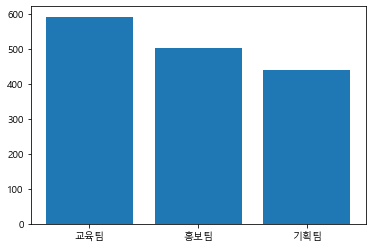

In [14]:
x=['교육팀','홍보팀','기획팀']
y=[]
for row in rows:
    y.append(row[1])

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rc,font_manager
font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)

plt.bar(x,y)